### Домашняя работа

**Задание простого уровня** Загрузите данные из файла `non_linear.csv` и сгенерируйте данные до степени *degree = 8* включительно. Обучите модель `sklearn.linear_model.Lasso` и модель `sklearn.linear_model.Ridge` на полученных данных, используйте коэффициент регуляризации $\alpha=0.8$ для обеих моделей. Постройте два столбчатых графика, на которых отобразите величину коэффициентов для Ridge регрессии и Lasso регрессии в виде столбиков.

Пример графиков для 3-й степени (просто для примера, у вас может по-другому выглядеть). Какой можно сделать в вывод по величине коэффициентов?:
![coeff_example](https://pp.userapi.com/c850136/v850136613/19282c/OfwruuxOkPw.jpg)

In [1]:
import numpy as np
import pandas as pd

data = pd.read_csv('/Users/mikhail/Data Science Projects/Data Scientist/1. ML. Начальный уровень/03/3_10_non_linear.csv', sep=',')
data.head()

,x_train,y_train
0,0.138368,0.838812
1,0.157237,0.889313
2,0.188684,1.430040
3,0.685553,1.717309
4,0.874237,2.032588


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error

def generate_degrees(source_data: list, degree: int):
    """Функция, которая принимает на вход одномерный массив, а возвращает n-мерный
    Для каждой степени от 1 до  degree возводим x в эту степень
    """
    return np.array([
          source_data**n for n in range(1, degree + 1)  
    ]).T

In [3]:
degree = 8
X = generate_degrees(data['x_train'],degree)
X.shape

(50, 8)

In [5]:
y = data.y_train.values
y.shape

(50,)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)


In [7]:
model_Ridge = Ridge(alpha=0.8).fit(X_train,y_train)
model_Lasso = Lasso(alpha=0.8).fit(X_train,y_train)

/Users/mikhail/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.163e+00, tolerance: 2.447e-03
  model = cd_fast.enet_coordinate_descent(


In [8]:
y_pred_Ridge = model_Ridge.predict(X_test)
y_train_pred_Ridge = model_Ridge.predict(X_train)
y_pred_Lasso = model_Lasso.predict(X_test)
y_train_pred_Lasso = model_Lasso.predict(X_train)

In [9]:
print("Качество на валидации Ridge: %.3f" % mean_squared_error(y_test, y_pred_Ridge))
print("Качество на обучении Ridge: %.3f" % mean_squared_error(y_train, y_train_pred_Ridge))

print("Качество на валидации Lasso: %.3f" % mean_squared_error(y_test, y_pred_Lasso))
print("Качество на обучении Lasso: %.3f" % mean_squared_error(y_train, y_train_pred_Lasso))

Качество на валидации Ridge: 0.106
Качество на обучении Ridge: 0.063
Качество на валидации Lasso: 0.236
Качество на обучении Lasso: 0.115


In [10]:
model_Ridge.coef_

array([ 4.51020859e-01,  3.24287309e-01, -1.17719595e-02, -2.30535714e-01,
        8.23958445e-02, -6.23832746e-03, -8.71126994e-04,  1.07728321e-04])

In [11]:
ridge_coefs = model_Ridge.coef_
lasso_coefs = model_Lasso.coef_


In [13]:
import matplotlib.pyplot as plt

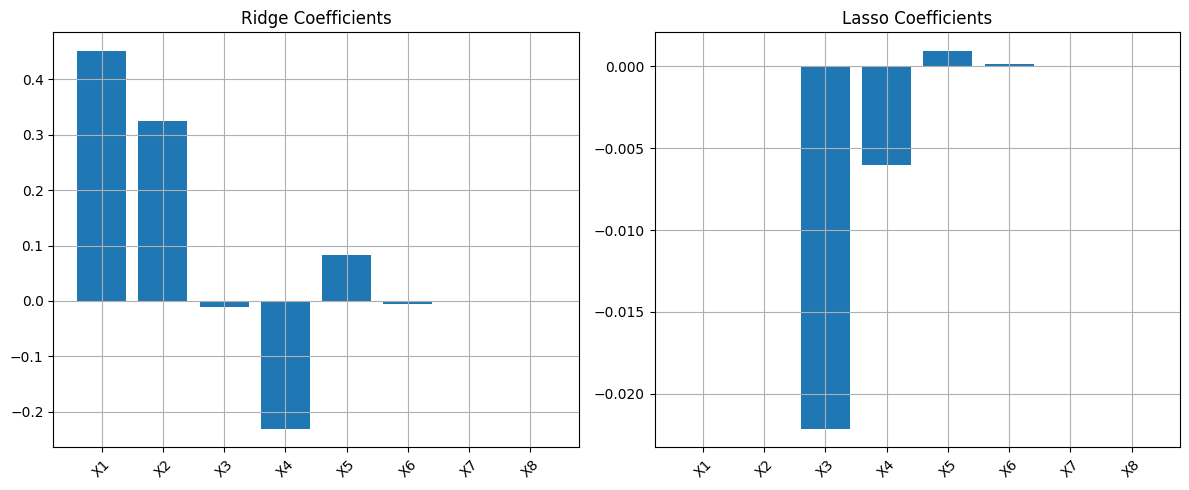

In [19]:
# Названия признаков
feature_names = ['X1','X2','X3','X4','X5','X6','X7','X8']

# Построение графика
plt.figure(figsize=(12, 5))

# Ridge график
plt.subplot(1, 2, 1)
plt.bar(feature_names, ridge_coefs)
plt.title("Ridge Coefficients")
plt.xticks(rotation=45)
plt.grid(True)

# Lasso график
plt.subplot(1, 2, 2)
plt.bar(feature_names, lasso_coefs)
plt.title("Lasso Coefficients")
plt.xticks(rotation=45)
plt.grid(True)

plt.tight_layout()
plt.show()
